<h1> Lung Cancer Prediction Using KNN, Naive Bayes and SVM Algorithm. </h1>

<h2> Importing Required Libraries </h2>

The initial stage in formulating a solution involves importing the essential libraries, specifically optimized for efficient procedures and operations throughout the development process.

In [1]:
# necessary libraries

import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

<h2>Importing Selected Dataset</h2>

The dataset's CSV file will be imported, and its stored data will be explored through the utilization of a data frame.

In [2]:
df = pd.read_csv('Lung Cancer Dataset.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,YES
1,M,74,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,YES
2,F,59,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NO
3,M,63,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NO
4,F,63,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,M,70,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,YES
1288,M,71,2.0,1.0,2.0,1.0,1.0,2.0,NaN,1.0,NaN,1.0,2.0,NaN,2.0,NO
1289,M,58,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,YES
1290,M,67,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,YES


In [3]:
# describing the shape of dataset

df.shape

(1292, 16)

In [4]:
# describing the dataframe based on its columns, data types and non-null cells

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 1291 non-null   object 
 1   AGE                    1292 non-null   int64  
 2   SMOKING                1288 non-null   float64
 3   YELLOW_FINGERS         1284 non-null   float64
 4   ANXIETY                1276 non-null   float64
 5   PEER_PRESSURE          1272 non-null   float64
 6   CHRONIC DISEASE        1284 non-null   float64
 7   FATIGUE                1280 non-null   float64
 8   ALLERGY                1268 non-null   float64
 9   WHEEZING               1280 non-null   float64
 10  ALCOHOL CONSUMING      1284 non-null   float64
 11  COUGHING               1280 non-null   float64
 12  SHORTNESS OF BREATH    1268 non-null   float64
 13  SWALLOWING DIFFICULTY  1276 non-null   float64
 14  CHEST PAIN             1280 non-null   float64
 15  LUNG

In [5]:
# generating descriptive statistics, including count, mean, std, min, and quartiles, for numerical columns in the DataFrame 

df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,1292.000000,1288.000000,1284.000000,1276.000000,1272.000000,1284.000000,1280.000000,1268.000000,1280.000000,1284.000000,1280.000000,1268.000000,1276.000000,1280.00000
mean,62.585139,1.571429,1.566978,1.498433,1.493711,1.495327,1.678125,1.548896,1.553125,1.557632,1.581250,1.640379,1.467085,1.55625
std,8.220133,0.495064,0.495687,0.500194,0.500157,0.500173,0.467378,0.497800,0.497364,0.496861,0.493547,0.480079,0.499111,0.49702
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
50%,62.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.00000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000


In [6]:
# counting the number of values

df.count()

GENDER                   1291
AGE                      1292
SMOKING                  1288
YELLOW_FINGERS           1284
ANXIETY                  1276
PEER_PRESSURE            1272
CHRONIC DISEASE          1284
FATIGUE                  1280
ALLERGY                  1268
WHEEZING                 1280
ALCOHOL CONSUMING        1284
COUGHING                 1280
SHORTNESS OF BREATH      1268
SWALLOWING DIFFICULTY    1276
CHEST PAIN               1280
LUNG_CANCER              1292
dtype: int64

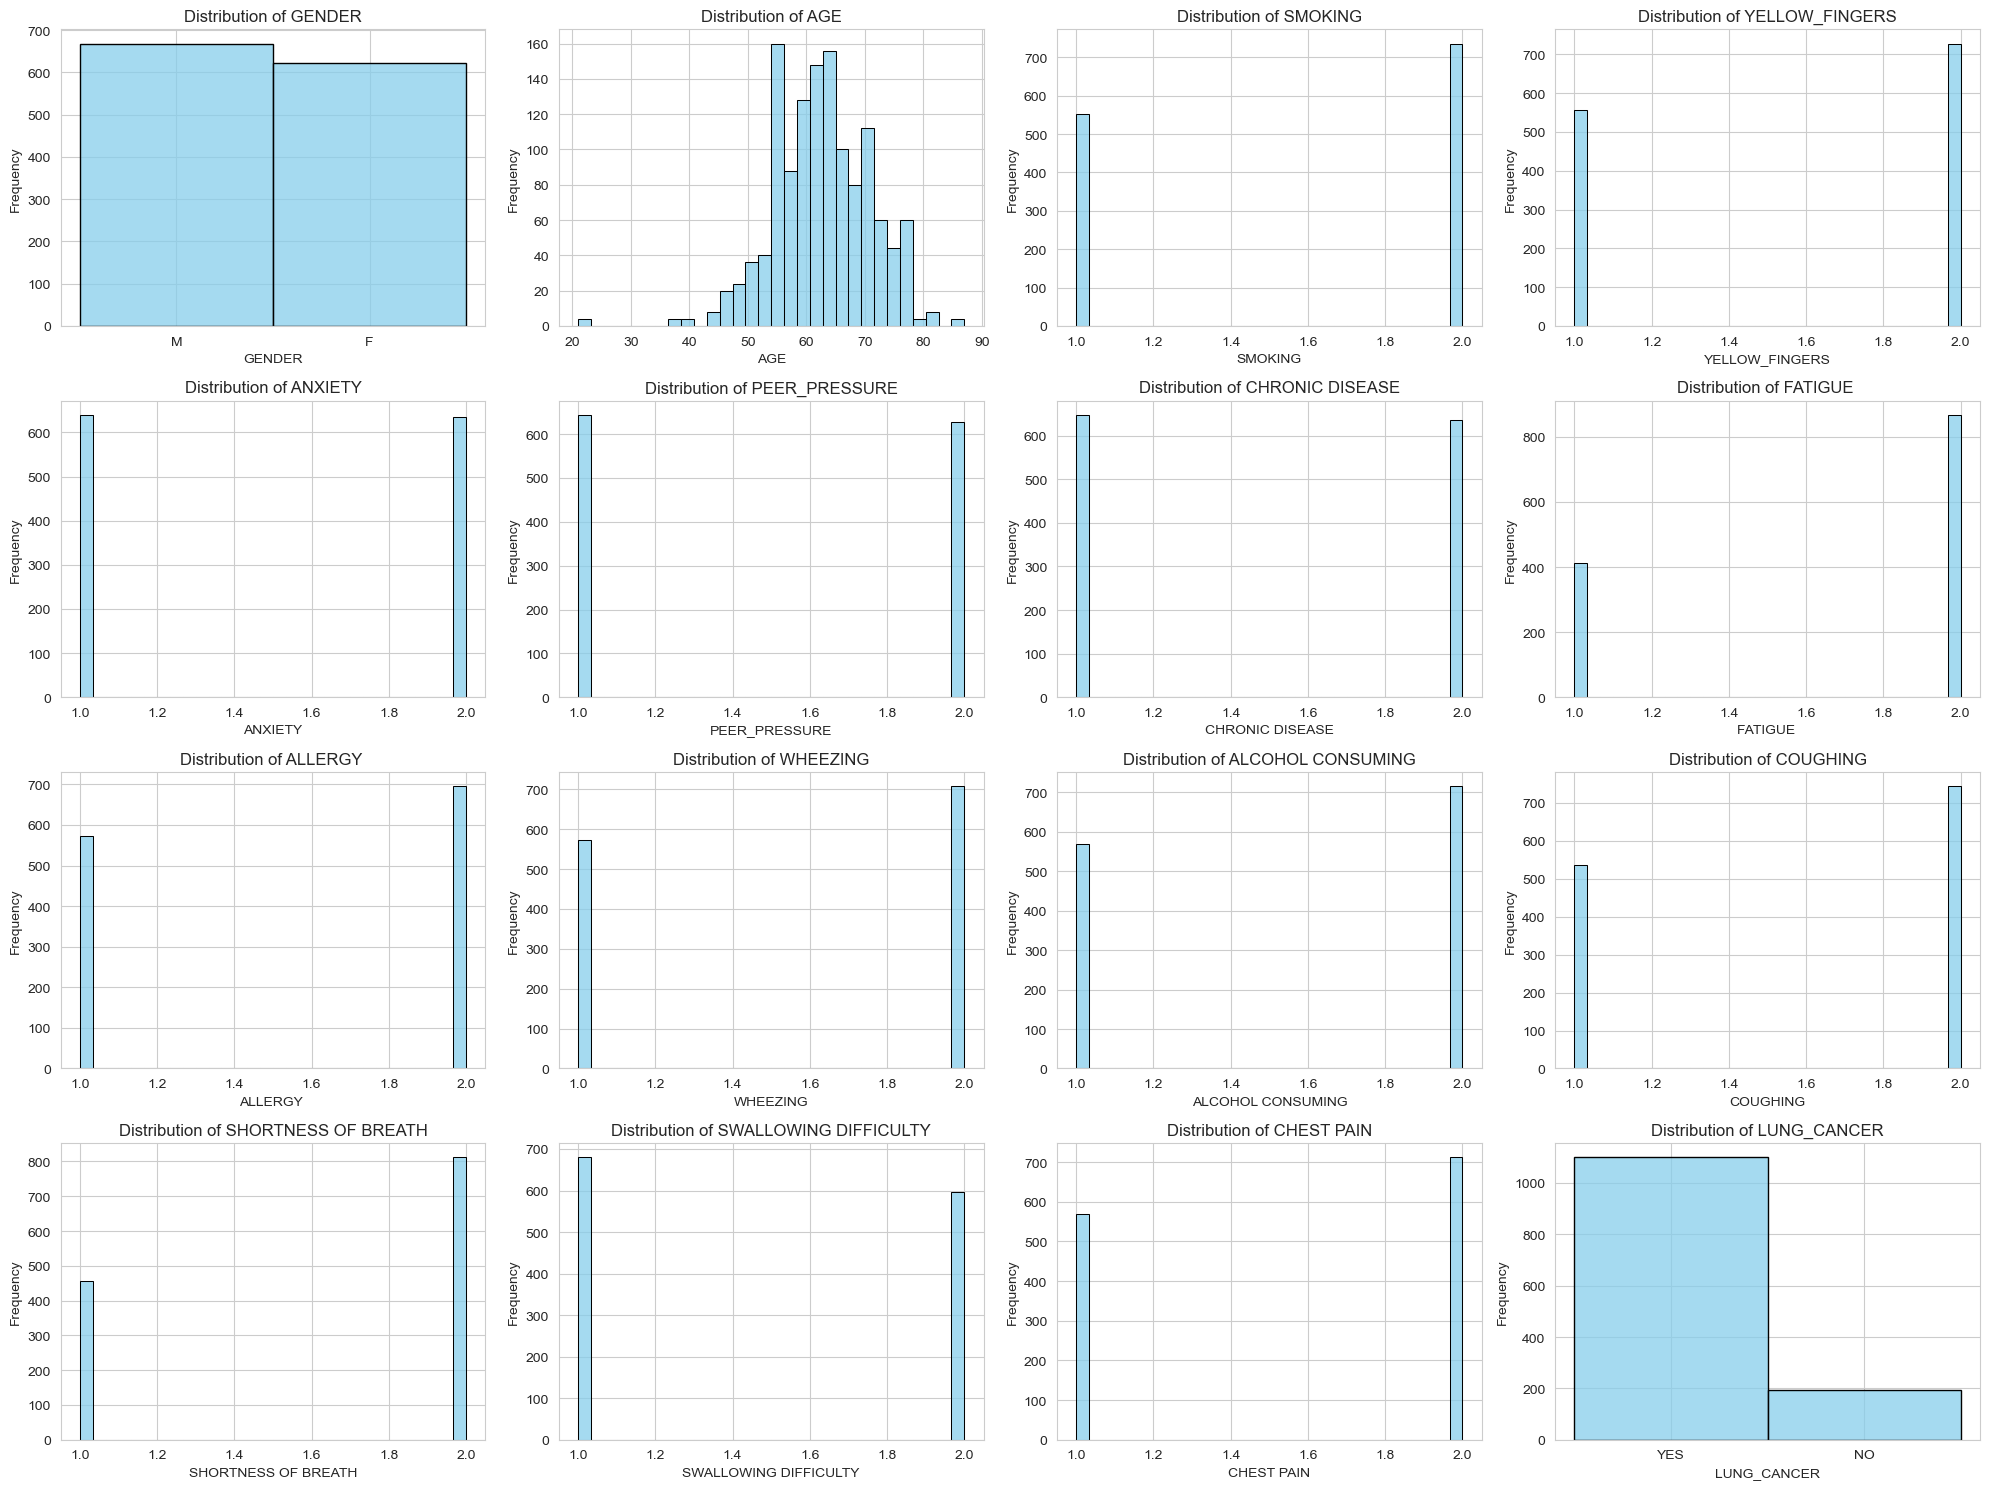

In [7]:
sns.set_style("whitegrid")

plt.figure(figsize=(20,15))

#looping through all the columns to create a histogram
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=False, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

<h2> Examination of Missing Values </h2>

Since, the data set may contain a few null or missing values, it is necessary to evaluate the data frame and remove the row will null value dataset.

In [8]:
# checking for null values

df.isnull().sum()

GENDER                    1
AGE                       0
SMOKING                   4
YELLOW_FINGERS            8
ANXIETY                  16
PEER_PRESSURE            20
CHRONIC DISEASE           8
FATIGUE                  12
ALLERGY                  24
WHEEZING                 12
ALCOHOL CONSUMING         8
COUGHING                 12
SHORTNESS OF BREATH      24
SWALLOWING DIFFICULTY    16
CHEST PAIN               12
LUNG_CANCER               0
dtype: int64

In [9]:
# examination of total number of missing values on each column and their respective percentages

def missing_values(data): 
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    percentage_final = (round(percentage, 2) * 100)
    total_percent = pd.concat(objs=[total, percentage_final], axis = 1, keys=['Total', '%'])
    return total_percent

In [10]:
null_values = missing_values(df)
null_values

,Total,%
ALLERGY,24,2.0
SHORTNESS OF BREATH,24,2.0
PEER_PRESSURE,20,2.0
ANXIETY,16,1.0
SWALLOWING DIFFICULTY,16,1.0
FATIGUE,12,1.0
WHEEZING,12,1.0
COUGHING,12,1.0
CHEST PAIN,12,1.0
YELLOW_FINGERS,8,1.0


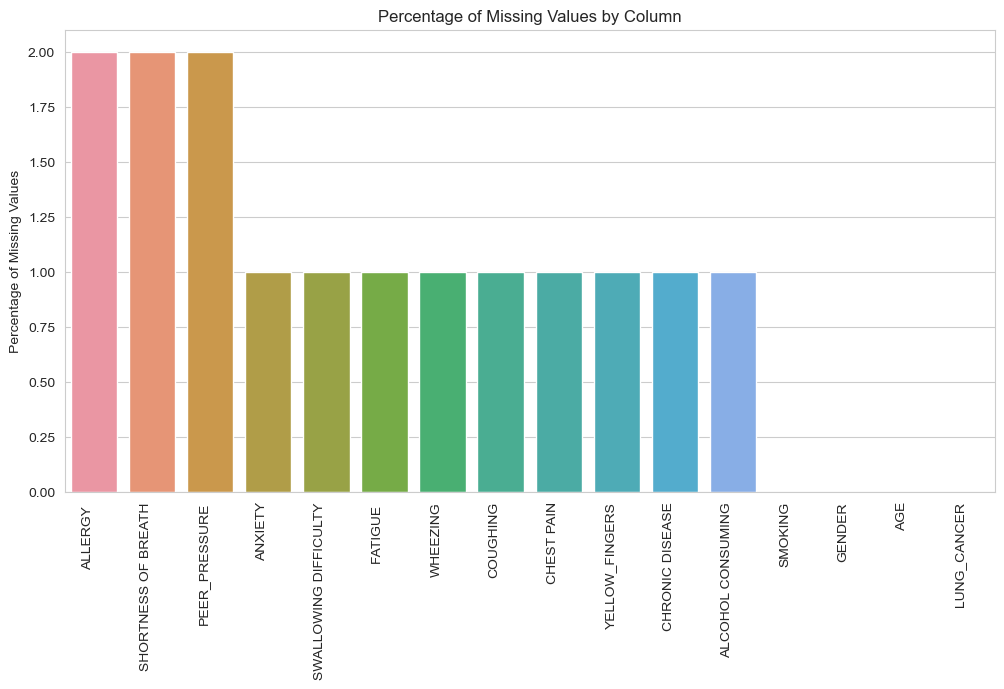

In [11]:
# plotting into the graph for proper visualization

plt.figure(figsize=(12, 6))
sns.barplot(x=null_values.index, y=null_values['%'])
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.show()

In [12]:
# dropping the rows with null values and re-indexing the data series

df = df.dropna()

# resetting the index
df = df.reset_index(drop=True)

df.shape

(1235, 16)

<h2> Change of categorial values to numerical values </h2>

As the ML algorithms work on the basis of mathematical expressions and calculations, it is necessary to convert every categorial items which are in the form of string or objects in the particular data frame to its respective mathematical figure.

In [13]:
# encoding categorical values in the gender column of a DataFrame using label encoding

df['GENDER'] = df["GENDER"].\
apply(lambda x: list(df["GENDER"].unique()).index(x))

In [14]:
# encoding categorical values in the lung_cancer column of a DataFrame using label encoding

df['LUNG_CANCER'] = df["LUNG_CANCER"].\
apply(lambda x: list(df["LUNG_CANCER"].unique()).index(x))

In [15]:
# describing the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 1235 non-null   int64  
 1   AGE                    1235 non-null   int64  
 2   SMOKING                1235 non-null   float64
 3   YELLOW_FINGERS         1235 non-null   float64
 4   ANXIETY                1235 non-null   float64
 5   PEER_PRESSURE          1235 non-null   float64
 6   CHRONIC DISEASE        1235 non-null   float64
 7   FATIGUE                1235 non-null   float64
 8   ALLERGY                1235 non-null   float64
 9   WHEEZING               1235 non-null   float64
 10  ALCOHOL CONSUMING      1235 non-null   float64
 11  COUGHING               1235 non-null   float64
 12  SHORTNESS OF BREATH    1235 non-null   float64
 13  SWALLOWING DIFFICULTY  1235 non-null   float64
 14  CHEST PAIN             1235 non-null   float64
 15  LUNG

In [16]:
# dataframe

df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1,0,74,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,0
2,1,59,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1
3,0,63,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1
4,1,63,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,56,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0
1231,0,70,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0
1232,0,58,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0
1233,0,67,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,0


<h2> Finding Correlation</h2>

Correlation analysis is a valuable tool for generating insights and guiding further investigation in data analysis and modeling processes.

In [17]:
# corelation of all variables in dataframe

corelation = df.corr()
corelation

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.023149,-0.042703,0.217957,0.157868,0.270060,0.199027,0.087517,-0.160671,-0.136241,-0.449449,-0.128557,0.069156,0.084205,-0.358097,0.065126
AGE,-0.023149,1.000000,-0.084822,0.005436,0.053459,0.018429,-0.012915,0.012802,0.027710,0.055267,0.059242,0.170233,-0.017320,-0.000990,-0.017875,-0.089574
SMOKING,-0.042703,-0.084822,1.000000,-0.013797,0.161339,-0.043785,-0.142584,-0.028956,0.000884,-0.128714,-0.049844,-0.128793,0.061998,0.031726,0.121040,-0.058562
YELLOW_FINGERS,0.217957,0.005436,-0.013797,1.000000,0.565527,0.324021,0.041863,-0.118608,-0.143628,-0.079193,-0.289835,-0.013248,-0.106528,0.345419,-0.105524,-0.181137
ANXIETY,0.157868,0.053459,0.161339,0.565527,1.000000,0.217834,-0.008865,-0.189219,-0.164990,-0.192673,-0.166596,-0.226495,-0.144777,0.488962,-0.114442,-0.144706
PEER_PRESSURE,0.270060,0.018429,-0.043785,0.324021,0.217834,1.000000,0.047734,0.078762,-0.082786,-0.068095,-0.159364,-0.088388,-0.219707,0.367773,-0.094172,-0.186783
CHRONIC DISEASE,0.199027,-0.012915,-0.142584,0.041863,-0.008865,0.047734,1.000000,-0.110026,0.105567,-0.049274,0.002882,-0.174713,-0.025863,0.076112,-0.036235,-0.111254
FATIGUE,0.087517,0.012802,-0.028956,-0.118608,-0.189219,0.078762,-0.110026,1.000000,0.003691,0.141507,-0.191980,0.146447,0.441509,-0.133478,-0.011341,-0.150497
ALLERGY,-0.160671,0.027710,0.000884,-0.143628,-0.164990,-0.082786,0.105567,0.003691,1.000000,0.174822,0.345436,0.190450,-0.029399,-0.060602,0.240443,-0.328297
WHEEZING,-0.136241,0.055267,-0.128714,-0.079193,-0.192673,-0.068095,-0.049274,0.141507,0.174822,1.000000,0.265186,0.373880,0.037314,0.068312,0.147090,-0.249120


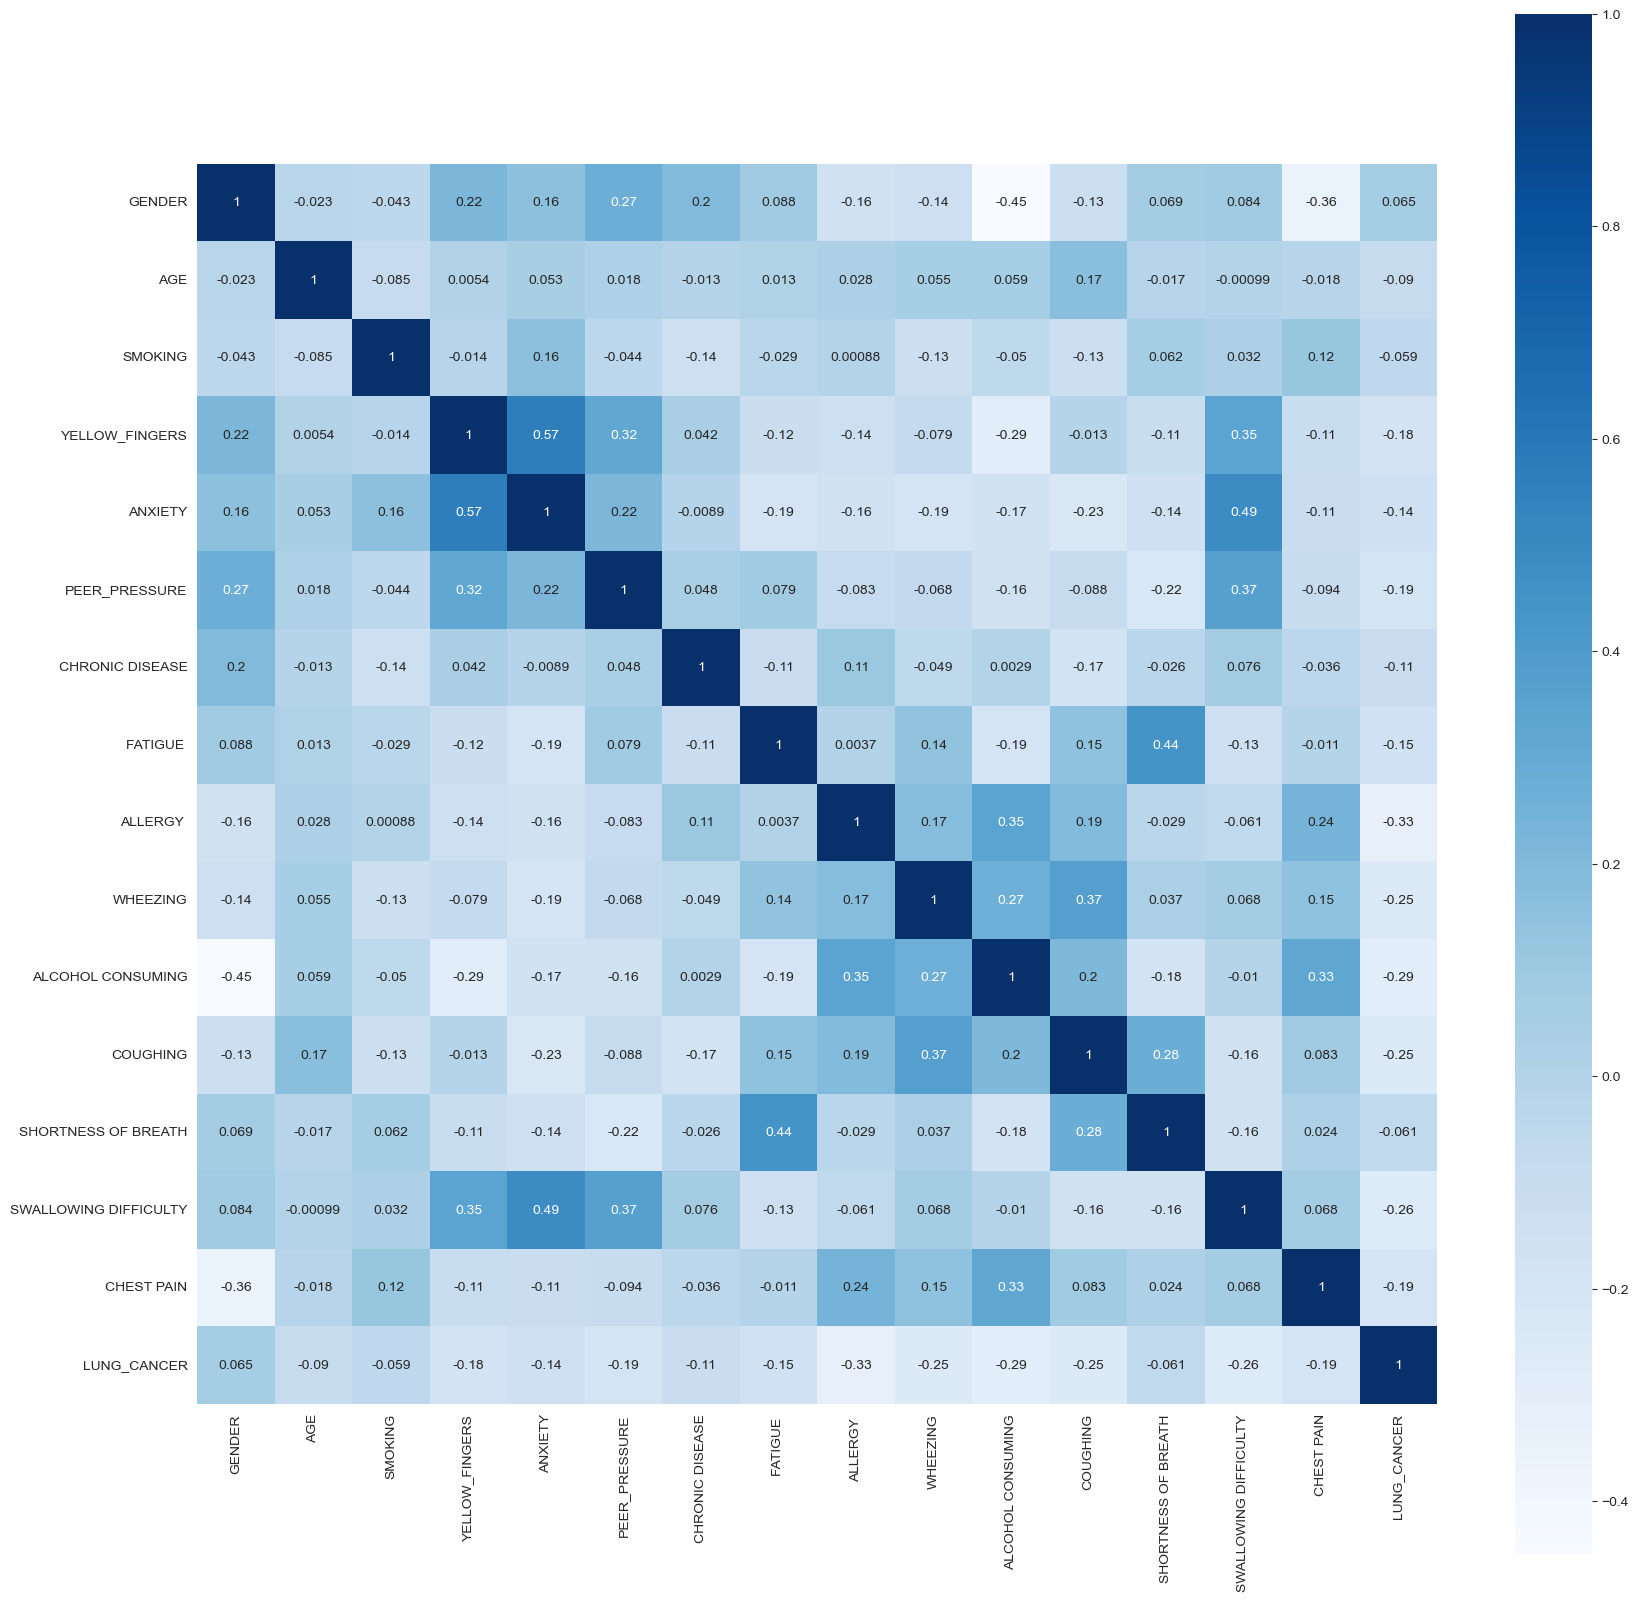

In [18]:
custom_cmap = "Blues"

# annoted heatmap visualization of pairwise correlation 
plt.subplots(figsize=(20, 20))
sns.heatmap(corelation, cmap=custom_cmap, annot=True, square=True)
plt.show()

<h2> Feature Scaling </h2>

In the preprocessing stage, it is essential to standardize the data values to ensure they have a consistent format.

In [19]:
# standardizing the dataframe values

scaler=StandardScaler()

scaler.fit(df) 

scaled_data=scaler.transform(df)

scaled_data 

array([[-0.95796757,  0.77130724, -1.13634508, ...,  1.06441905,
         0.89312431, -0.38023455],
       [-0.95796757,  1.38106555,  0.88001437, ...,  1.06441905,
         0.89312431, -0.38023455],
       [ 1.04387667, -0.44820939, -1.13634508, ..., -0.93947962,
         0.89312431,  2.62995564],
       ...,
       [-0.95796757, -0.57016105,  0.88001437, ..., -0.93947962,
         0.89312431, -0.38023455],
       [-0.95796757,  0.52740391,  0.88001437, ..., -0.93947962,
         0.89312431, -0.38023455],
       [-0.95796757, -0.0823544 , -1.13634508, ...,  1.06441905,
        -1.11966497, -0.38023455]])

<h2> Principal Component Analysis </h2>

In [20]:
# representating the data in a lower-dimensional space 

pca=PCA(n_components=10) 

pca.fit(scaled_data) 

x_pca=pca.transform(scaled_data) 

In [21]:
x_pca

array([[ 0.69149406, -1.24126196, -0.99975545, ...,  1.88906196,
         0.20406413, -0.62578122],
       [ 0.70924454,  0.35545211,  0.28705196, ...,  1.64732615,
        -0.20359666, -0.12921357],
       [ 0.49286727,  2.69219959, -0.93007159, ...,  0.68276831,
         0.1986841 ,  1.96776181],
       ...,
       [ 2.63549929, -0.61864757,  1.82753163, ..., -1.49894004,
        -0.4460645 ,  0.74459414],
       [ 1.88640022, -0.00318976,  0.15521042, ..., -0.22242826,
         0.80091762, -0.79416855],
       [ 0.76188984, -0.8233692 ,  0.49761028, ..., -0.20668126,
        -0.53287905, -1.83568943]])

<h2> Seperating Train and Test Values </h2>

After all the cleaning, processing and decomposition is set, it is necessary to separate the dataset into training data and test data in the ratio of 80:20. 

In [22]:
y = df.iloc[:, -1]

In [23]:
# splitting of train and test data based on the respective axis

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 0)

<h2> Applying Gaussian Naive Bayes Algorithm </h2>

In [24]:
#implementation of Naive Bayes Algorithm through Gaussian Laws to calculate the score for train and test data
    
classifier_naive = GaussianNB()

classifier_naive.fit(x_train, y_train)

GaussianNB()

In [25]:
# predicting result using testing data

y_pred = classifier_naive.predict(x_test)  

y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [26]:
# determining model accuracy

y_pred_prob = classifier_naive.predict_proba(x_test)
    
print(classification_report(y_test,y_pred))

print(f"Train Score : {classifier_naive.score(x_train, y_train)}")
print(f"Test Score : {classifier_naive.score(x_test, y_test)}")

print("\nAccuracy of Naive Bayes model in Lung Cancer Prediction:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       214
           1       1.00      0.88      0.94        33

    accuracy                           0.98       247
   macro avg       0.99      0.94      0.96       247
weighted avg       0.98      0.98      0.98       247

Train Score : 0.9838056680161943
Test Score : 0.9838056680161943

Accuracy of Naive Bayes model in Lung Cancer Prediction: 0.9838056680161943


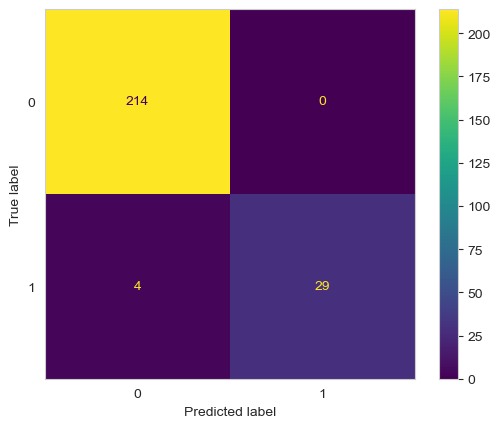

In [27]:
# generating and displaying confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# plotting confusion matrix without grid
fig, ax = plt.subplots()
cm_display.plot(ax=ax)
ax.grid(False)

plt.show()

<h2> Applying K Nearest Neighbor Algorithm </h2>

In [28]:
#implementation of K Nearest Neighbour Algorithm to calculate the score for train and test data
    
classifier_knn = KNN(n_neighbors = 3)

classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
# predicting result using testing data

y_pred = classifier_knn.predict(x_test)  

y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [30]:
# determining model accuracy

y_pred_prob = classifier_knn.predict_proba(x_test)
    
print(classification_report(y_test,y_pred))

print(f"Train Score : {classifier_knn.score(x_train, y_train)}")
print(f"Test Score : {classifier_knn.score(x_test, y_test)}")

print("\nAccuracy of K Nearest Neighbour model in Lung Cancer Prediction:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00        33

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247

Train Score : 1.0
Test Score : 1.0

Accuracy of K Nearest Neighbour model in Lung Cancer Prediction: 1.0


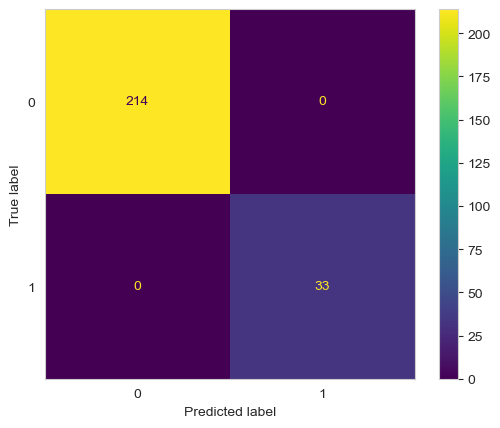

In [31]:
# generating and displaying confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# plotting confusion matrix without grid
fig, ax = plt.subplots()
cm_display.plot(ax=ax)
ax.grid(False)

plt.show()

<h2> Applying Support Vector Machine Algorithm </h2>

In [32]:
#implementation of Naive Bayes Algorithm through Gaussian Laws to calculate the score for train and test data
    
classifier_svc = SVC()

classifier_svc.fit(x_train, y_train)

SVC()

In [33]:
# predicting result using testing data

y_pred = classifier_svc.predict(x_test)  

y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [34]:
# determining model accuracy
    
print(classification_report(y_test,y_pred))

print(f"Train Score : {classifier_svc.score(x_train, y_train)}")
print(f"Test Score : {classifier_svc.score(x_test, y_test)}")

print("\nAccuracy of Support Vector Machine model in Lung Cancer Prediction:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00        33

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247

Train Score : 1.0
Test Score : 1.0

Accuracy of Support Vector Machine model in Lung Cancer Prediction: 1.0


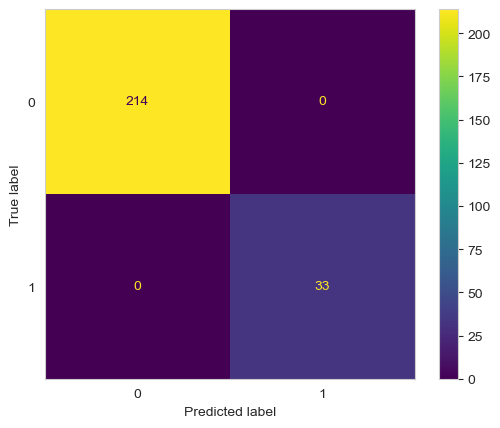

In [35]:
# generating and displaying confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# plotting confusion matrix without grid
fig, ax = plt.subplots()
cm_display.plot(ax=ax)
ax.grid(False)

plt.show()

<h2> K-Fold Cross Validation</h2>

K-Fold cross validation is a robust method for model evaluation that helps to reduce the risk of overfitting and provides a more accurate estimate of the model's performance.

In [36]:
# K-Fold Cross Validation

k = 5

k_fold = KFold(n_splits=k, shuffle=True, random_state=42)

In [37]:
# Gaussian naive bayes model

# using cross_val_score to perform k-fold cross-validation
gnb_model_scores = cross_val_score(classifier_naive, x_pca, y, cv=k_fold)

print("Gaussian Naive Bayes models' average accuracy:", np.mean(gnb_model_scores))

Gaussian Naive Bayes models' average accuracy: 0.982995951417004


In [38]:
# K-Nearest Neighbour model

# using cross_val_score to perform k-fold cross-validation
knn_model_scores = cross_val_score(classifier_knn, x_pca, y, cv=k_fold)

print("K-Nearest Neighbour models' average accuracy:", np.mean(knn_model_scores))

K-Nearest Neighbour models' average accuracy: 1.0


In [39]:
# Support Vector model

# using cross_val_score to perform k-fold cross-validation
svc_model_scores = cross_val_score(classifier_svc, x_pca, y, cv=k_fold)

print("Support Vector Machine models' average accuracy:", np.mean(svc_model_scores))

Support Vector Machine models' average accuracy: 1.0


<h2> Hyper Parameter Tuning using GridSearchCV </h2>

GridSearchCV implements a fit and a score method to find the best performing parameters for the algorithm. 

In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score, f1_score

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
n_classes = len(np.unique(Y_digits))

# defining hyperparameters that will be optimized
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
}

# using ShuffleSplit to shuffle the data before each iteration
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=None)

# creating a new object in each iteration
for iteration in range(10):
    svc_grid = GridSearchCV(SVC(), param_grid=params, n_jobs=-1, cv=cv, verbose=5)
    svc_grid.fit(X_digits, Y_digits)

    y_pred = svc_grid.predict(X_digits)
    
    precision = precision_score(Y_digits, y_pred, average='weighted')
    f1 = f1_score(Y_digits, y_pred, average='weighted')

    print(f'\nIteration {iteration + 1}:')
    print('Best Accuracy Through Grid Search: {:.3f}'.format(svc_grid.best_score_))
    print('Best Parameters: {}\n'.format(svc_grid.best_params_))
    print('Precision: {:.3f}'.format(precision))
    print('F1 Score: {:.3f}\n'.format(f1))

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Iteration 1:
Best Accuracy Through Grid Search: 0.990
Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'rbf'}

Precision: 1.000
F1 Score: 1.000

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Iteration 2:
Best Accuracy Through Grid Search: 0.987
Best Parameters: {'C': 1, 'degree': 2, 'kernel': 'rbf'}

Precision: 0.997
F1 Score: 0.997

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Iteration 3:
Best Accuracy Through Grid Search: 0.993
Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'rbf'}

Precision: 1.000
F1 Score: 1.000

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Iteration 4:
Best Accuracy Through Grid Search: 0.989
Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'rbf'}

Precision: 1.000
F1 Score: 1.000

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Iteration 5:
Best Accuracy Through Grid Search: 0.990
Best Parameters: {'C': 1, 'degree': 3, 'kernel':